## Problem Statement

In the competitive landscape of the travel industry, customer retention is vital for sustaining revenue and ensuring long-term success. The **Tour & Travels Customer Churn Prediction dataset** provides an opportunity to analyze and predict customer behavior, specifically focusing on churn. This dataset includes several key indicators that influence customer decisions, such as:

- **Age**: The age of the customers.
- **Frequent Flyer Status**: Indicates whether the customer is a frequent flyer.
- **Annual Income Class**: Classification of customers based on their income levels.
- **Services Opted Frequency**: The number of services utilized by the customer.
- **Account Synced to Social Media**: Whether the customer's account is linked to social media platforms.
- **Booked Hotel or Not**: A binary indicator showing whether the customer has booked a hotel.

The primary objective of this project is to build predictive models that can accurately forecast customer churn. By identifying customers who are likely to churn, the travel company can implement targeted strategies to retain them, thereby saving valuable resources.

This dataset is freely available for practice and can be utilized for hackathons, making it an excellent resource for analysts and data scientists. The binary target variable in this dataset differentiates between customers who churn (1) and those who do not (0), guiding the modeling and analysis process.

Through exploratory data analysis (EDA) and predictive modeling, this project aims to reveal actionable insights that contribute to effective churn prediction and enhance customer retention strategies in the travel industry.


In [130]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import warnings
# Suppress FutureWarning messages
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier


In [131]:
df =  pd.read_csv("Customertravel.csv")

In [132]:
df.head(3)

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,No,Middle Income,6,No,Yes,0
1,34,Yes,Low Income,5,Yes,No,1
2,37,No,Middle Income,3,Yes,No,0


In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         954 non-null    int64 
 1   FrequentFlyer               954 non-null    object
 2   AnnualIncomeClass           954 non-null    object
 3   ServicesOpted               954 non-null    int64 
 4   AccountSyncedToSocialMedia  954 non-null    object
 5   BookedHotelOrNot            954 non-null    object
 6   Target                      954 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 52.3+ KB


In [134]:
df.duplicated().sum()

507

In [135]:
df.drop_duplicates(inplace=True)

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 447 entries, 0 to 950
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         447 non-null    int64 
 1   FrequentFlyer               447 non-null    object
 2   AnnualIncomeClass           447 non-null    object
 3   ServicesOpted               447 non-null    int64 
 4   AccountSyncedToSocialMedia  447 non-null    object
 5   BookedHotelOrNot            447 non-null    object
 6   Target                      447 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 27.9+ KB


- **Age**: Customer's age group.
- **LoyaltyProgram**: If the customer is part of a loyalty program (like a rewards program).
- **AnnualIncomeClass**: Customer’s income level (low, medium, or high).
- **ServicesOpted**: Services the customer uses.
- **AccountSyncedToSocialMedia**: If the customer's account is linked to social media.
- **BookedHotelOrNot**: Whether the customer has booked a hotel.
- **Target**: Indicates if the customer has stopped using a service (1 = churned, 0 = not churned).

In [137]:
for i in df.columns:
    d = {f"{i}" : df[i].value_counts()}
    print(d)

{'Age': 30    70
34    51
37    45
31    42
29    42
28    40
27    36
36    36
35    34
33    26
38    25
Name: Age, dtype: int64}
{'FrequentFlyer': No           250
Yes          144
No Record     53
Name: FrequentFlyer, dtype: int64}
{'AnnualIncomeClass': Low Income       205
Middle Income    173
High Income       69
Name: AnnualIncomeClass, dtype: int64}
{'ServicesOpted': 1    150
4     80
2     71
3     63
5     55
6     28
Name: ServicesOpted, dtype: int64}
{'AccountSyncedToSocialMedia': No     261
Yes    186
Name: AccountSyncedToSocialMedia, dtype: int64}
{'BookedHotelOrNot': No     258
Yes    189
Name: BookedHotelOrNot, dtype: int64}
{'Target': 0    325
1    122
Name: Target, dtype: int64}


In [138]:
a = df.describe()
a

,Age,ServicesOpted,Target
count,447.000000,447.000000,447.000000
mean,32.225951,2.782998,0.272931
std,3.464807,1.641632,0.445965
min,27.000000,1.000000,0.000000
25%,29.000000,1.000000,0.000000
50%,31.000000,3.000000,0.000000
75%,35.000000,4.000000,1.000000
max,38.000000,6.000000,1.000000


# EDA

## Class Balance of Target Variable

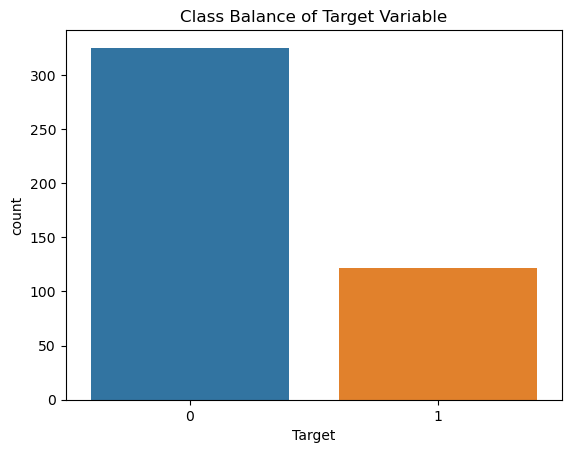

In [218]:
sns.countplot(x='Target', data=df)
plt.title('Class Balance of Target Variable');

## Frequent Flyer vs Churn

Text(0.5, 1.0, 'Frequent Flyer vs Churn')

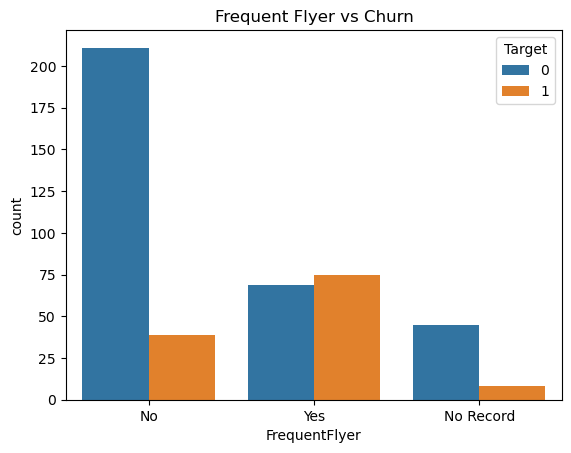

In [225]:
sns.countplot(x='FrequentFlyer', hue='Target', data=df)
plt.title('Frequent Flyer vs Churn')

## Account Synced to Social Media vs Churn

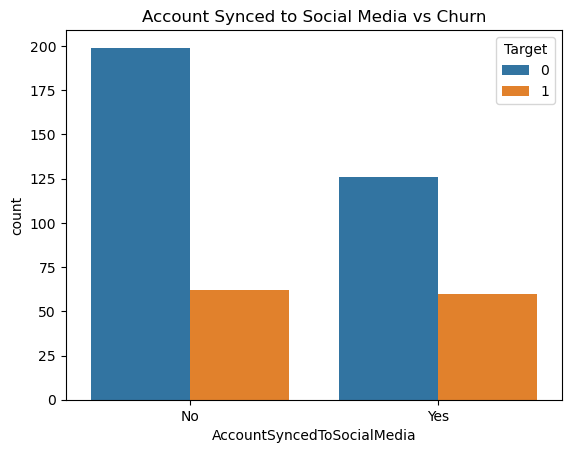

In [228]:
sns.countplot(x='AccountSyncedToSocialMedia', hue='Target', data=df)
plt.title('Account Synced to Social Media vs Churn');

## Hotel Booked vs Churn

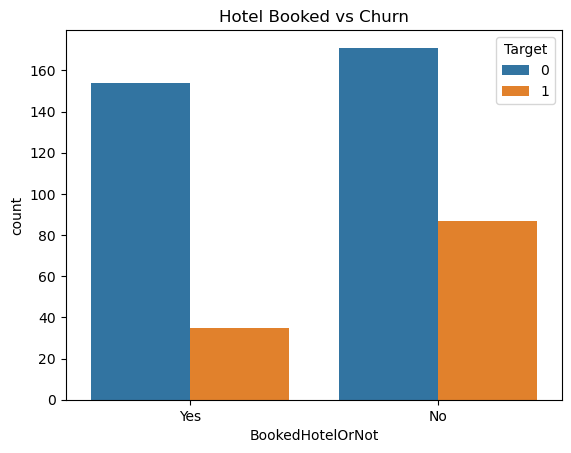

In [230]:
sns.countplot(x='BookedHotelOrNot', hue='Target', data=df)
plt.title('Hotel Booked vs Churn');

## Correlation

Text(0.5, 1.0, 'Correlation Matrix')

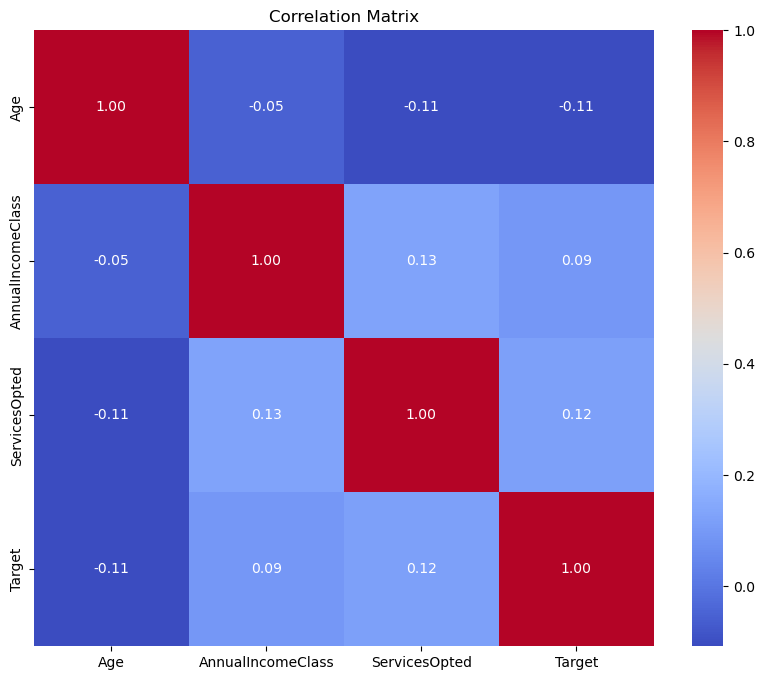

In [231]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')

Text(0.5, 1.0, 'Age vs Churn')

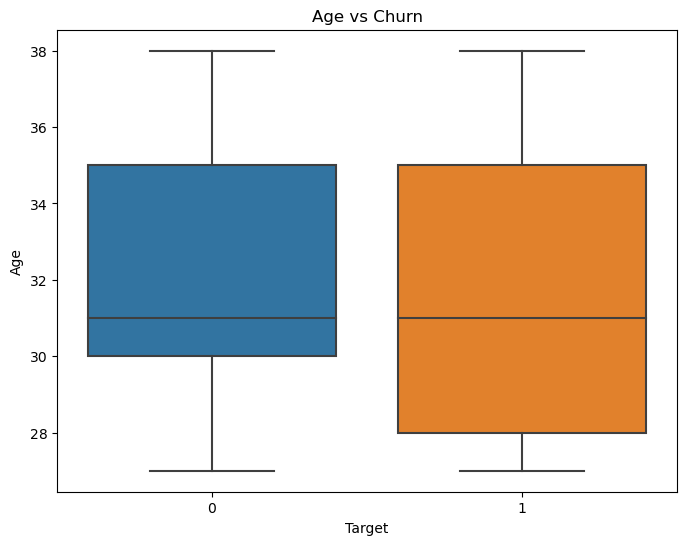

In [233]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Target', y='Age', data=df)
plt.title('Age vs Churn')

## Frequent Flyer and Income Class vs Churn

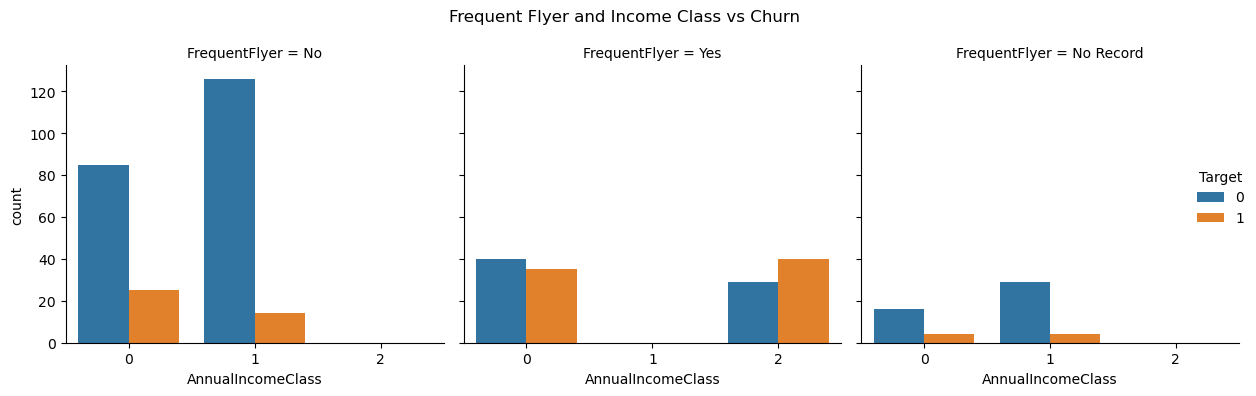

In [234]:
sns.catplot(x='AnnualIncomeClass', hue='Target', col='FrequentFlyer',
            data=df, kind='count', height=4, aspect=1)
plt.suptitle('Frequent Flyer and Income Class vs Churn')
plt.tight_layout()

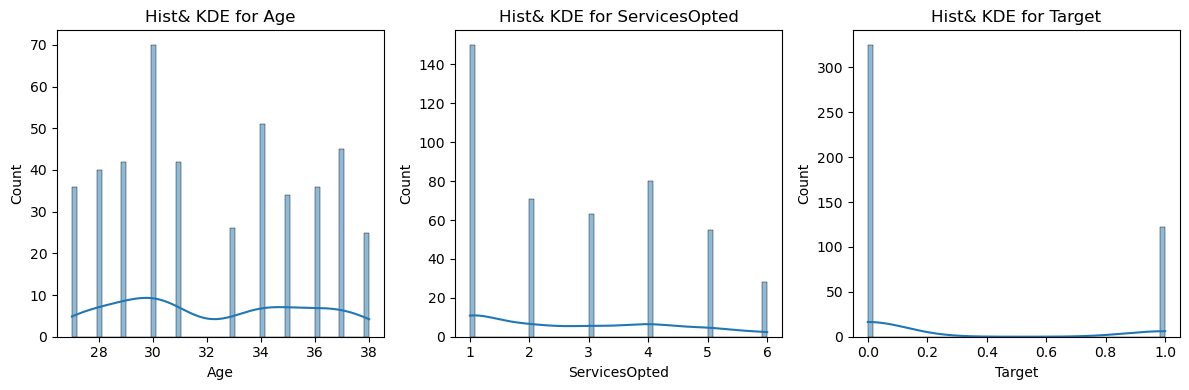

In [139]:
columns = a.columns
# Create a Q-Q plot for each column
plt.figure(figsize=(12, 4))
for i, column in enumerate(columns, 1):
    plt.subplot(1, 3, i)  # Adjust subplot grid based on the number of columns
    sns.histplot(df[column].dropna(), bins=60, kde=True)
    plt.title(f'Hist& KDE for {column}')

plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='FrequentFlyer', ylabel='count'>

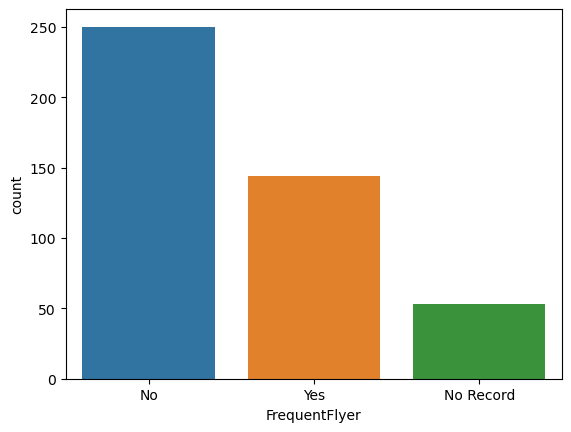

In [140]:
sns.countplot(x='FrequentFlyer', data=df)

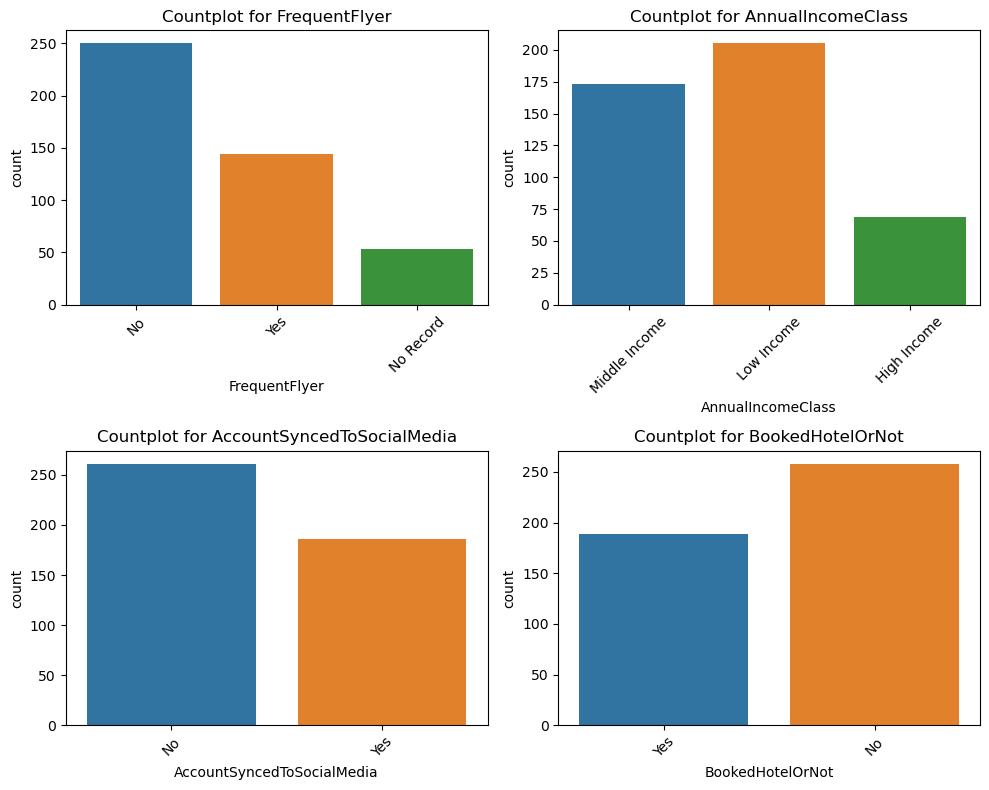

In [141]:
cols = df.select_dtypes("object").columns

# Create a Q-Q plot for each column
plt.figure(figsize=(10, 8))
for i, column in enumerate(cols, 1):
    plt.subplot(2, 2, i)  # Adjust subplot grid based on the number of columns
    sns.countplot(x=df[column].dropna())
    plt.title(f'Countplot for {column}')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()

# **Encoding Categorical Data**

In [142]:
map_income = {
    'Low Income': 0,
    'Middle Income': 1, 
    'High Income': 2
}

# Map the income classes to integers
df['AnnualIncomeClass'] = df['AnnualIncomeClass'].map(map_income)


In [143]:
churn_data = pd.get_dummies(df, columns=['FrequentFlyer', 'AccountSyncedToSocialMedia', 'BookedHotelOrNot'], dtype = bool)
churn_data

,Age,AnnualIncomeClass,ServicesOpted,Target,FrequentFlyer_No,FrequentFlyer_No Record,FrequentFlyer_Yes,AccountSyncedToSocialMedia_No,AccountSyncedToSocialMedia_Yes,BookedHotelOrNot_No,BookedHotelOrNot_Yes
0,34,1,6,0,True,False,False,True,False,False,True
1,34,0,5,1,False,False,True,False,True,True,False
2,37,1,3,0,True,False,False,False,True,True,False
3,30,1,2,0,True,False,False,True,False,True,False
4,30,0,1,0,True,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
932,29,0,3,0,True,False,False,False,True,True,False
936,36,1,1,0,False,True,False,False,True,False,True
940,27,0,1,0,True,False,False,True,False,False,True
947,38,1,2,0,False,True,False,False,True,True,False


# **Train test split**

In [209]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_features = ['Age']
churn_data[num_features] = scaler.fit_transform(churn_data[num_features])

In [210]:
# Create a new order for columns: first bool, then int, then float
bool_cols = churn_data.select_dtypes(include='bool').columns.tolist()
int_cols = churn_data.select_dtypes(include='int').columns.tolist()
float_cols = churn_data.select_dtypes(include='float').columns.tolist()

new_order = bool_cols + int_cols + float_cols

# Reindex the DataFrame
churn_data = churn_data[new_order]


In [211]:
X = churn_data.drop("Target", axis = 1)

In [212]:
y = churn_data["Target"]

In [213]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=20)
X_test.columns

Index(['FrequentFlyer_No', 'FrequentFlyer_No Record', 'FrequentFlyer_Yes',
       'AccountSyncedToSocialMedia_No', 'AccountSyncedToSocialMedia_Yes',
       'BookedHotelOrNot_No', 'BookedHotelOrNot_Yes', 'AnnualIncomeClass',
       'ServicesOpted', 'Age'],
      dtype='object')

In [214]:
models = [
    ('LR', LogisticRegression(random_state=42)),
    ('KNN', KNeighborsClassifier()),
    ('DTC', DecisionTreeClassifier(random_state=42)),
    ('RF', RandomForestClassifier(random_state=42)),
    ('SVM', SVC(gamma='auto', random_state=42, probability=True)),
    ('GBC', GradientBoostingClassifier(random_state=42))
]

In [215]:
results = []

# Evaluate each model
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    cm = confusion_matrix(y_test, y_pred)
    
    results.append((name, accuracy, precision, recall, f1, roc_auc, cm))
    
    # Print the metrics
    print(f"{name} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, "
          f"Recall: {recall:.4f}, F1 Score: {f1:.4f}, ROC AUC: {roc_auc:.4f}, {cm}")

    
    

LR - Accuracy: 0.8111, Precision: 0.5000, Recall: 0.4118, F1 Score: 0.4516, ROC AUC: 0.7168, [[66  7]
 [10  7]]
KNN - Accuracy: 0.8444, Precision: 0.5789, Recall: 0.6471, F1 Score: 0.6111, ROC AUC: 0.8550, [[65  8]
 [ 6 11]]
DTC - Accuracy: 0.8667, Precision: 0.6087, Recall: 0.8235, F1 Score: 0.7000, ROC AUC: 0.8489, [[64  9]
 [ 3 14]]
RF - Accuracy: 0.8222, Precision: 0.5238, Recall: 0.6471, F1 Score: 0.5789, ROC AUC: 0.8807, [[63 10]
 [ 6 11]]
SVM - Accuracy: 0.7889, Precision: 0.4444, Recall: 0.4706, F1 Score: 0.4571, ROC AUC: 0.8239, [[63 10]
 [ 9  8]]
GBC - Accuracy: 0.9222, Precision: 0.7500, Recall: 0.8824, F1 Score: 0.8108, ROC AUC: 0.9617, [[68  5]
 [ 2 15]]
